In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 21.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/My Drive/DL Project

Mounted at /content/gdrive/
/content/gdrive/My Drive/DL Project


In [ ]:
import os
import requests
from huggingface_hub import hf_hub_download

# Create the data folder if it doesn't exist
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# URLs for the files
vocab_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/vocab.json'
merges_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/merges.txt'
# ckpt_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/v1-5-pruned-emaonly.ckpt'

# Download vocab.json and merges.txt
vocab_path = os.path.join(data_folder, 'vocab.json')
merges_path = os.path.join(data_folder, 'merges.txt')

response_vocab = requests.get(vocab_url)

with open(vocab_path, 'wb') as f:
    f.write(response_vocab.content)

response_merges = requests.get(merges_url)
with open(merges_path, 'wb') as f:
    f.write(response_merges.content)

# # Download v1-5-pruned-emaonly.ckpt
# ckpt_path = os.path.join(data_folder, 'v1-5-pruned-emaonly.ckpt')
# response_ckpt = requests.get(ckpt_url)
# with open(ckpt_path, 'wb') as f:
#     f.write(response_ckpt.content)

print("Files downloaded and saved to the 'data' folder.")

repo_id = "runwayml/stable-diffusion-v1-5"
filename = "v1-5-pruned-emaonly.ckpt"

# Download the model file
ckpt_path = hf_hub_download(repo_id=repo_id, filename=filename, cache_dir=data_folder)

print(f"Model downloaded and saved to {ckpt_path}")

Files downloaded and saved to the 'data' folder.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model downloaded and saved to data/models--runwayml--stable-diffusion-v1-5/snapshots/1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9/v1-5-pruned-emaonly.ckpt


In [19]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch
import importlib

importlib.reload(model_loader)
importlib.reload(pipeline)

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("./data/vocab.json", merges_file="./data/merges.txt")
model_file = "./data/models--runwayml--stable-diffusion-v1-5/snapshots/1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE|

#

Using device: cuda


In [20]:
import latent_space_manipulator
import cross_attention_map
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)
importlib.reload(pipeline)
importlib.reload(cross_attention_map)

<module 'cross_attention_map' from '/content/gdrive/MyDrive/DL Project/cross_attention_map.py'>

#Animal

Subject Info: {'horse': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  2%|▎         | 1/40 [00:00<00:07,  5.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


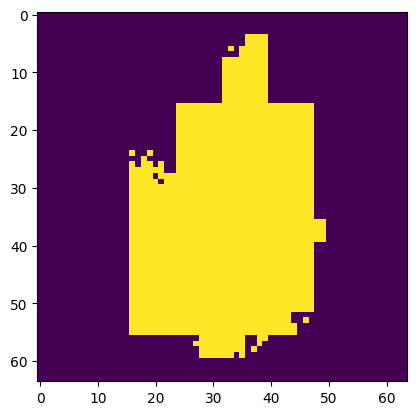

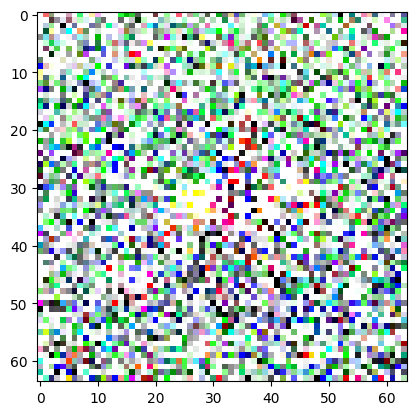

  5%|▌         | 2/40 [00:00<00:13,  2.85it/s]

dict_keys([220, 200, 240, 780, 999])


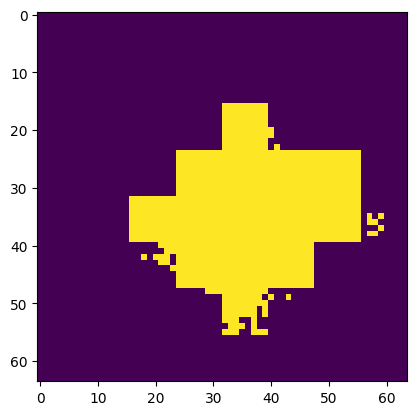

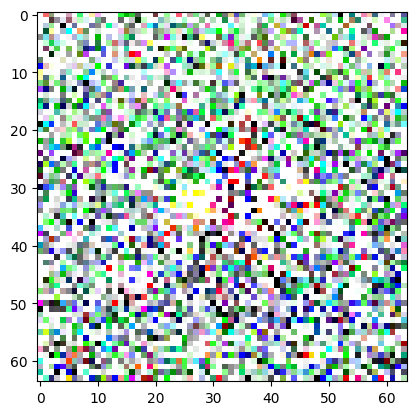

  8%|▊         | 3/40 [00:01<00:15,  2.34it/s]

dict_keys([220, 200, 240, 780, 999])


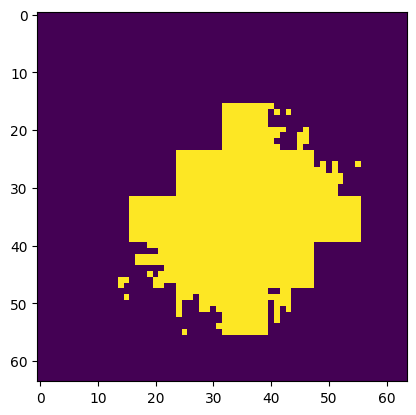

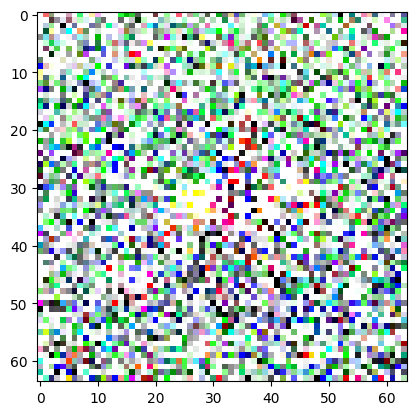

 12%|█▎        | 5/40 [00:01<00:12,  2.71it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:07,  4.51it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:05,  5.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  5.99it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  6.14it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.33it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.34it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:05<00:01,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:06<00:01,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:06<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:07<00:00,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.45it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse on beach"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000079229.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000079229-beach.jpg")

Subject Info: {'horse': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


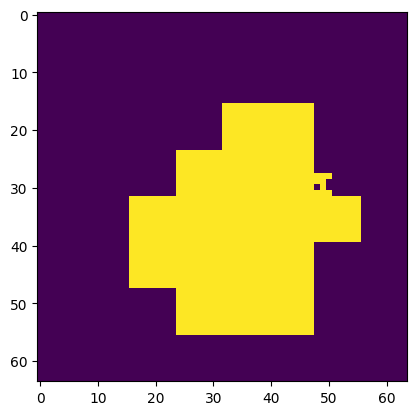

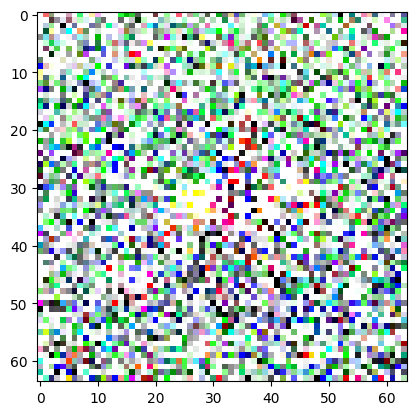

  5%|▌         | 2/40 [00:00<00:10,  3.76it/s]

dict_keys([220, 200, 240, 780, 999])


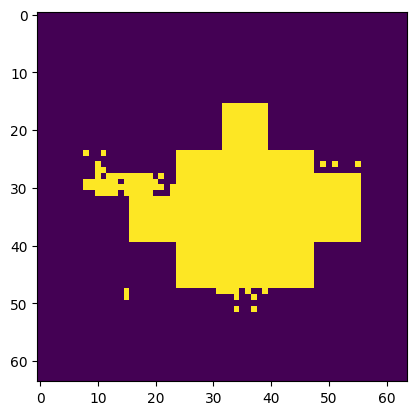

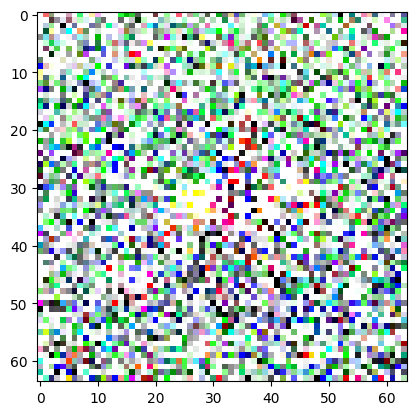

  8%|▊         | 3/40 [00:01<00:13,  2.71it/s]

dict_keys([220, 200, 240, 780, 999])


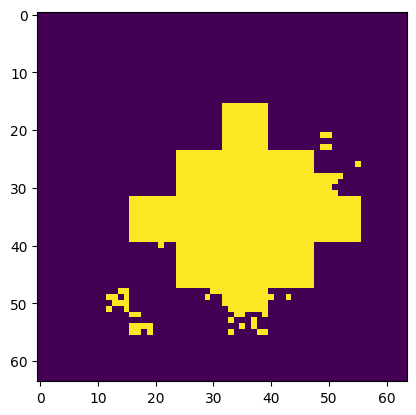

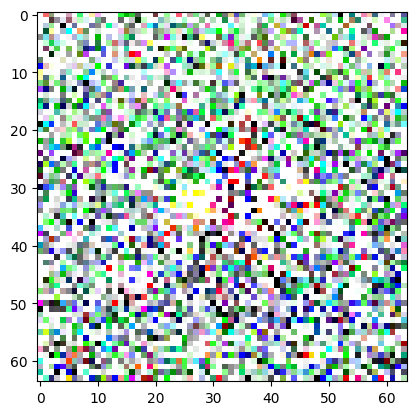

 12%|█▎        | 5/40 [00:01<00:11,  2.94it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:06,  4.70it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:05,  5.40it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.07it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.32it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.32it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:05<00:01,  6.32it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:06<00:00,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.56it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse on desert"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 14  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000079229.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img= Image.fromarray(output_image)
img.save("static/Animal/000000079229-desert.jpg")

Subject Info: {'horse': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


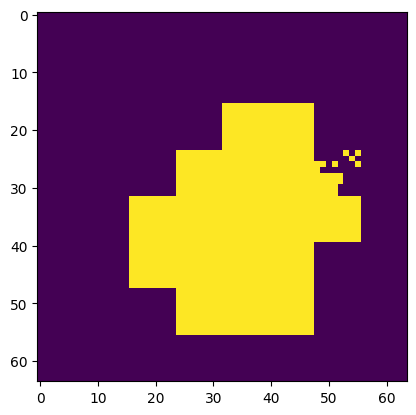

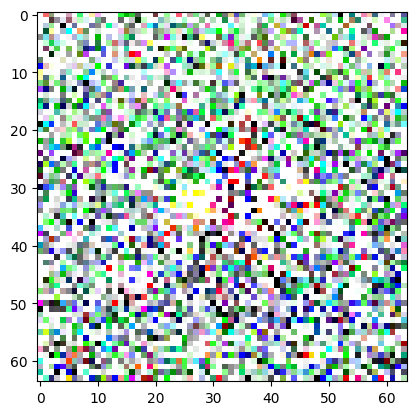

  5%|▌         | 2/40 [00:00<00:10,  3.49it/s]

dict_keys([220, 200, 240, 780, 999])


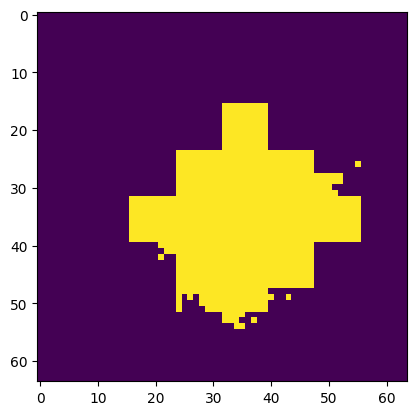

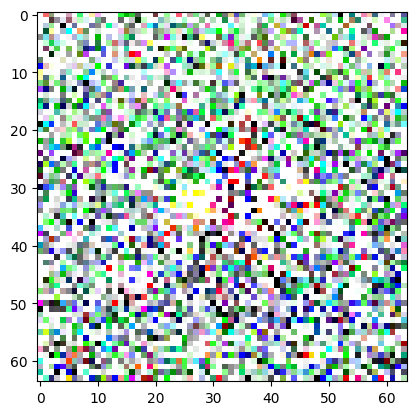

  8%|▊         | 3/40 [00:01<00:14,  2.63it/s]

dict_keys([220, 200, 240, 780, 999])


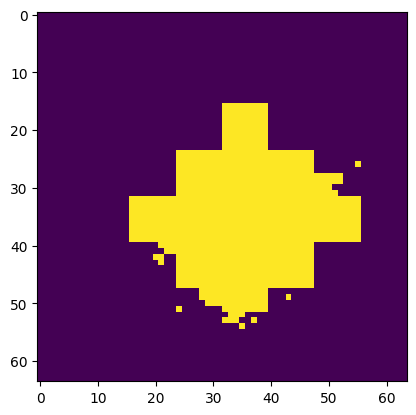

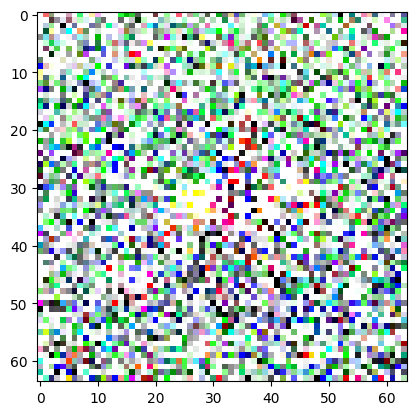

 12%|█▎        | 5/40 [00:01<00:12,  2.89it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:06,  4.66it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:05,  5.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.00it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:05<00:01,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:06<00:00,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.52it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse in forest"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000079229.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000079229-forest.jpg")

Subject Info: {'cat': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


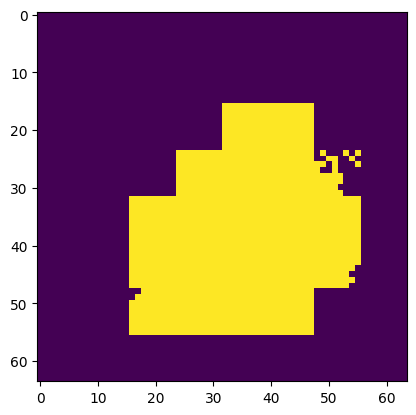

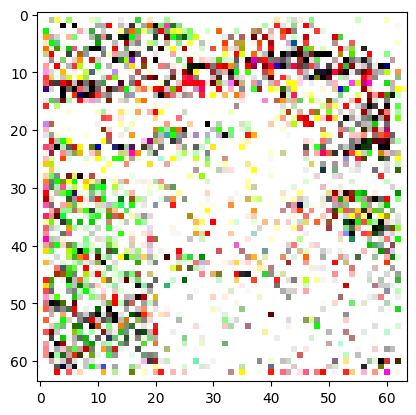

  5%|▌         | 2/40 [00:00<00:10,  3.67it/s]

dict_keys([220, 200, 240, 780, 999])


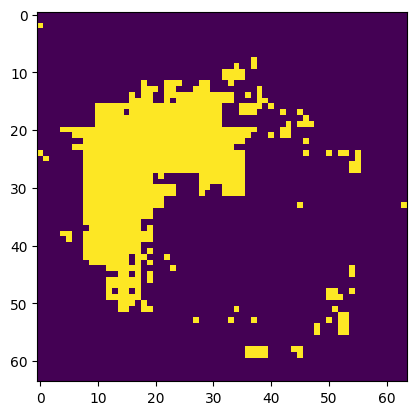

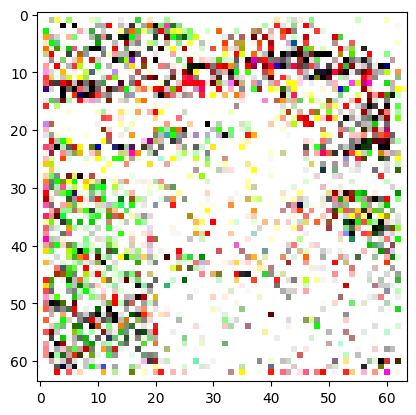

  8%|▊         | 3/40 [00:01<00:13,  2.78it/s]

dict_keys([220, 200, 240, 780, 999])


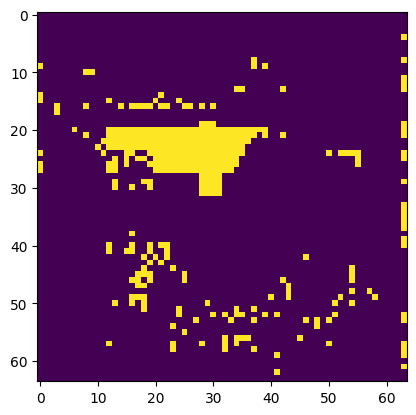

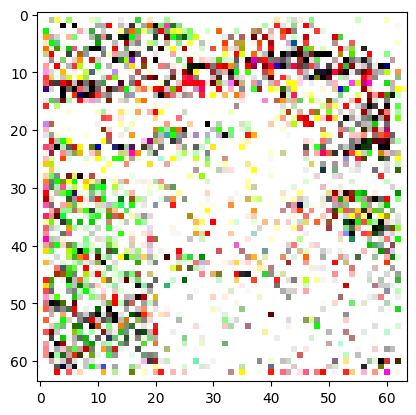

 12%|█▎        | 5/40 [00:01<00:13,  2.55it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:07,  4.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:05,  5.09it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  5.84it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  6.06it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.17it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:05<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:06<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:07<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.38it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat on beach"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000080666.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img = Image.fromarray(output_image)
img.save("static/Animal/000000080666-beach.jpg")

Subject Info: {'cat': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


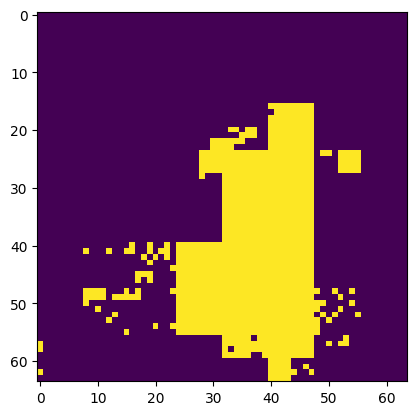

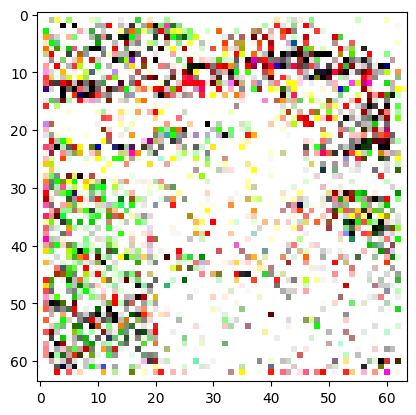

  5%|▌         | 2/40 [00:00<00:11,  3.44it/s]

dict_keys([220, 200, 240, 780, 999])


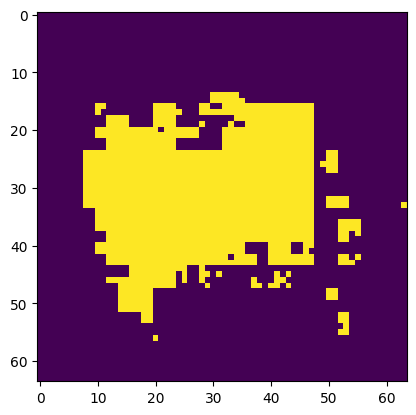

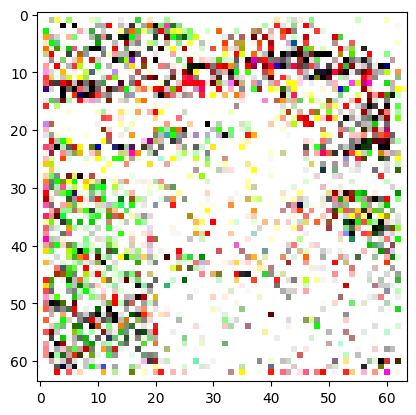

  8%|▊         | 3/40 [00:01<00:14,  2.63it/s]

dict_keys([220, 200, 240, 780, 999])


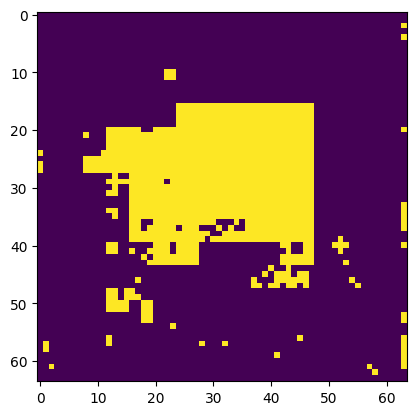

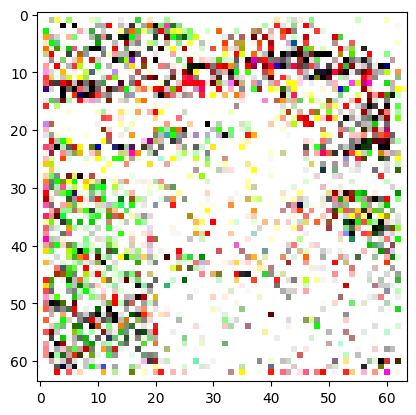

 12%|█▎        | 5/40 [00:01<00:11,  2.94it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:06,  4.71it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:05,  5.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:05<00:01,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:06<00:00,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat in desert"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000080666.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000080666-desert.jpg")

Subject Info: {'cat': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


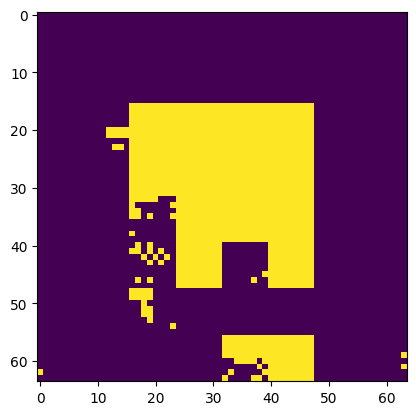

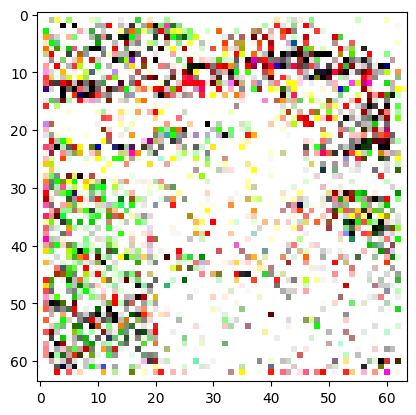

  2%|▎         | 1/40 [00:00<00:19,  2.02it/s]


KeyError: 0

In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat in forest"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000080666.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000080666-forest.jpg")

Subject Info: {'zebra': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(20), tensor(220), tensor(200), tensor(240), tensor(780)]


  2%|▎         | 1/40 [00:00<00:07,  5.22it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


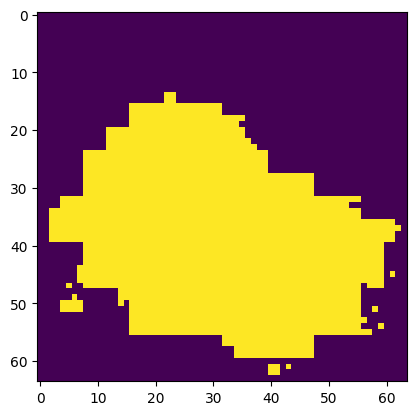

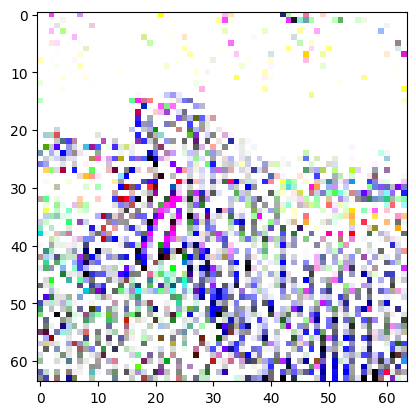

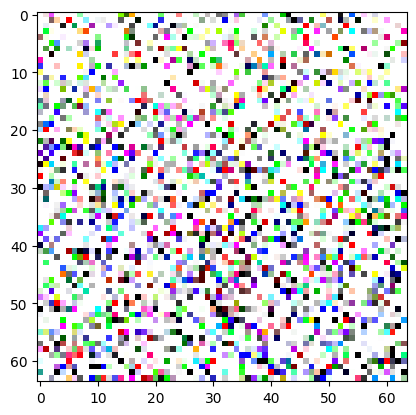

  5%|▌         | 2/40 [00:00<00:15,  2.44it/s]

dict_keys([20, 220, 200, 240, 780, 999])


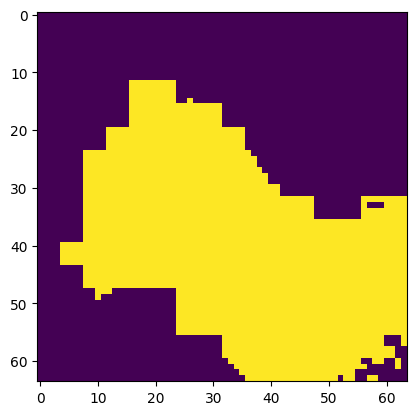

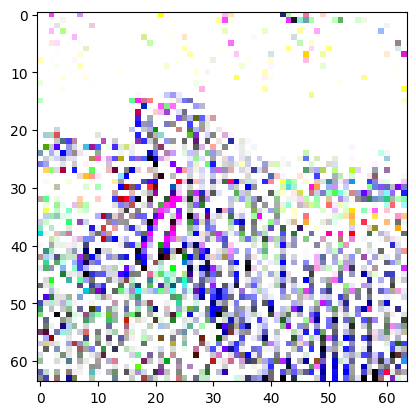

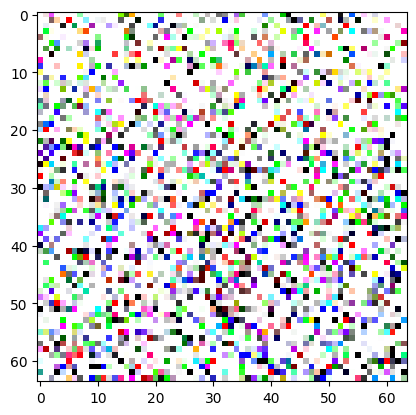

  8%|▊         | 3/40 [00:01<00:19,  1.91it/s]

dict_keys([20, 220, 200, 240, 780, 999])


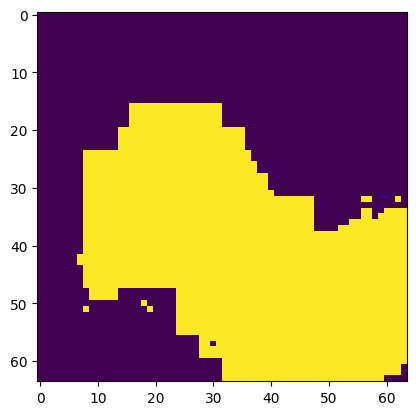

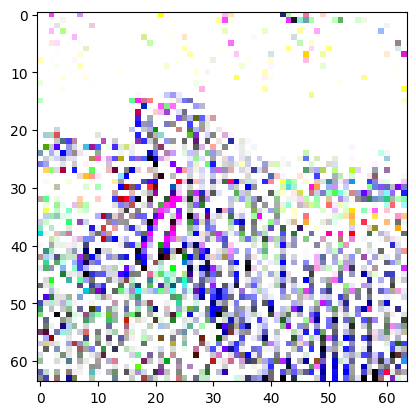

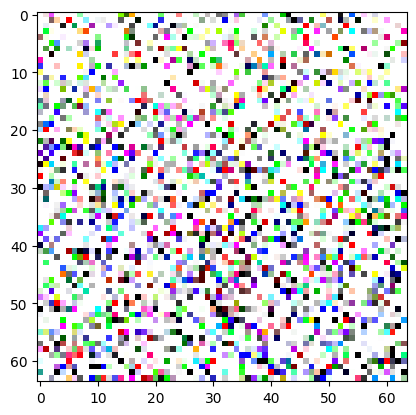

 12%|█▎        | 5/40 [00:02<00:15,  2.30it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:07,  4.09it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:06,  4.92it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:03<00:04,  5.74it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  5.99it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.13it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:04<00:03,  6.23it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.27it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.29it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:05<00:02,  6.31it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.32it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.31it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:06<00:01,  6.28it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:06<00:01,  6.25it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.28it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:07<00:00,  6.28it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:07<00:00,  6.30it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.19it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


In [21]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="zebra on beach"
focus="zebra"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000125211.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000125211-beach.jpg")

Subject Info: {'zebra': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(20), tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


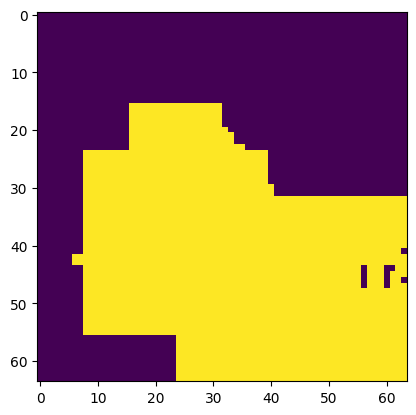

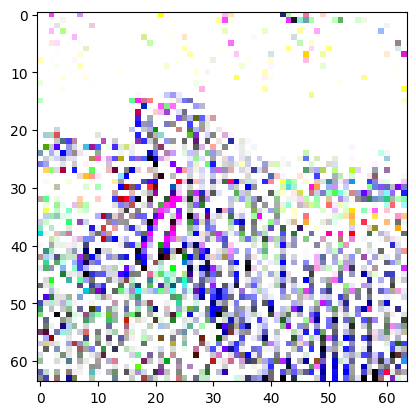

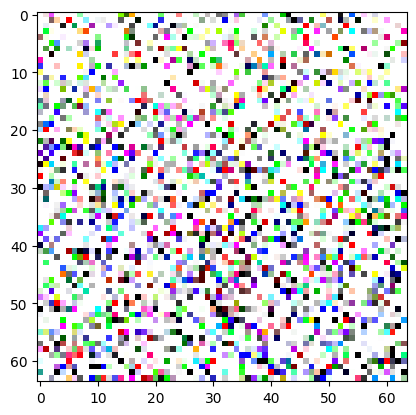

  5%|▌         | 2/40 [00:00<00:13,  2.88it/s]

dict_keys([20, 220, 200, 240, 780, 999])


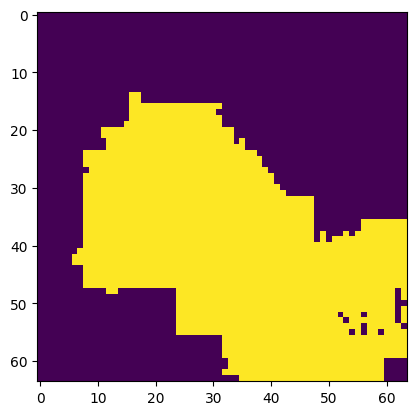

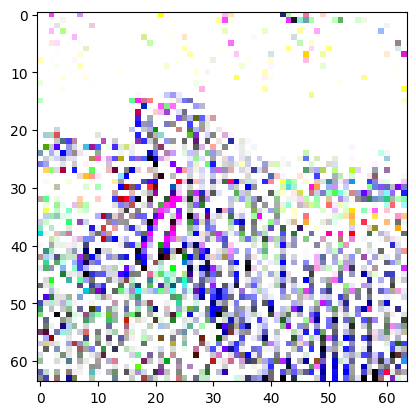

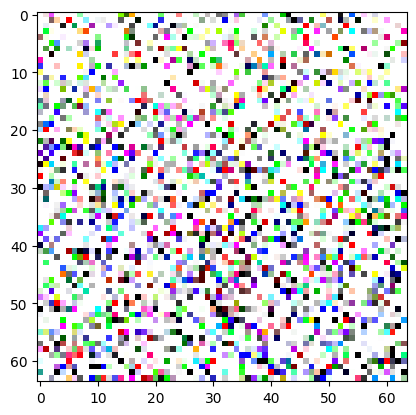

  8%|▊         | 3/40 [00:01<00:17,  2.07it/s]

dict_keys([20, 220, 200, 240, 780, 999])


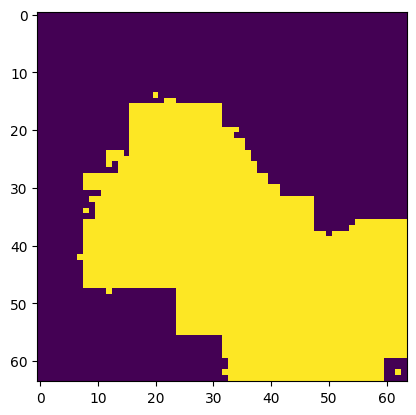

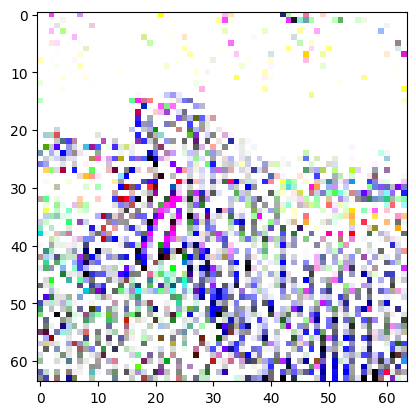

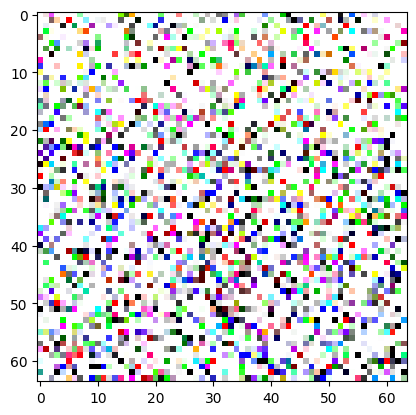

 12%|█▎        | 5/40 [00:02<00:14,  2.34it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:02<00:07,  4.08it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:02<00:06,  4.88it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:03<00:04,  5.68it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:03<00:04,  5.94it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:03<00:03,  6.10it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:04<00:03,  6.22it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:04<00:03,  6.26it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:04<00:02,  6.27it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:05<00:02,  6.29it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:05<00:02,  6.30it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:05<00:01,  6.25it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:06<00:01,  6.29it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:06<00:01,  6.27it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:06<00:00,  6.28it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:07<00:00,  6.29it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:07<00:00,  6.31it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:07<00:00,  5.20it/s]

dict_keys([20, 220, 200, 240, 780, 999])
dict_keys([20, 220, 200, 240, 780, 999])


In [22]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="zebra in desert"
focus="zebra"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000125211.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000125211-desert.jpg")

In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="zebra in forest"
focus="zebra"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000125211.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000125211-forest.jpg")

Subject Info: {'zebra': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.67it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.24it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.49it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.83it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.02it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.42it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.32it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.06it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="lamb on beach"
focus="lamb"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000176606.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000176606-beach.jpg")

Subject Info: {'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.00it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.67it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.89it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.51it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.13it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="lamb in desert"
focus="lamb"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000176606.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000176606-desert.jpg")

Subject Info: {'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.12it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.83it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:07,  5.00it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:01<00:04,  6.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.37it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.17it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="lamb in forest"
focus="lamb"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000176606.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000176606-forest.jpg")

Subject Info: {'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.14it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.84it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:06,  5.00it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:01<00:04,  6.49it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.36it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat on beach"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000186296.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000186296-beach.jpg")

Subject Info: {'cat': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.73it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.28it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.58it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.95it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.08it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.45it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.10it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat in desert"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000186296.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000186296-desert.jpg")

Subject Info: {'cat': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.98it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.59it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.82it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.06it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.56it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.40it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.14it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="cat in forest"
focus="cat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000186296.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000186296-forest.jpg")

Subject Info: {'cat': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.06it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.66it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.88it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.13it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.52it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant on beach"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000237864.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000237864-beach.jpg")

Subject Info: {'elephant': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.08it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.72it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:07,  4.90it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.52it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.41it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.33it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant in desert"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000237864.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000237864-desert.jpg")

Subject Info: {'elephant': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.08it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.73it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:07,  4.92it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.49it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.36it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant in forest"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000237864.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000237864-forest.jpg")

Subject Info: {'elephant': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.86it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.64it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.86it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.09it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.17it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.36it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.13it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="sheep on beach"
focus="sheep"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000278353.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000278353-beach.jpg")

Subject Info: {'sheep': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.90it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.52it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.77it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.10it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.46it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.12it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="sheep in desert"
focus="sheep"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000278353.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000278353-desert.jpg")

Subject Info: {'sheep': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.68it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.43it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.69it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.14it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.51it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.38it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.11it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="sheep in forest"
focus="sheep"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000278353.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000278353-forest.jpg")

Subject Info: {'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.72it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.50it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.76it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.46it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.30it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.11it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse on beach"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000319721.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000319721-beach.jpg")

Subject Info: {'horse': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.84it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.39it/s]

dict_keys([220, 200, 240, 780, 999])


 15%|█▌        | 6/40 [00:01<00:06,  5.59it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.94it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.10it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.46it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.35it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.07it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse in desert"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000319721.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000319721-desert.jpg")

Subject Info: {'horse': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.83it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.47it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.73it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.02it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.47it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.34it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.07it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.10it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="horse in forest"
focus="horse"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000319721.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000319721-forest.jpg")

Subject Info: {'horse': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:08,  4.51it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.25it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.57it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.97it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.10it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.46it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.34it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.06it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant on beach"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000475779.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000475779-beach.jpg")

Subject Info: {'elephant': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.80it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.38it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.67it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.00it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.44it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.32it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.17it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.08it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant in desert"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000475779.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000475779-desert.jpg")

Subject Info: {'elephant': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.74it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.36it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.63it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.95it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.08it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.45it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.36it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.26it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.08it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="elephant in forest"
focus="elephant"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000475779.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000475779-forest.jpg")

Subject Info: {'elephant': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.67it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.32it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.60it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.99it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.11it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.45it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.34it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.07it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="dog on beach"
focus="dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000575357.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000575357-beach.jpg")

Subject Info: {'dog': 0, 'beach': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.74it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.50it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.75it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.04it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.50it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.37it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.09it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="dog in desert"
focus="dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000575357.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000575357-desert.jpg")

Subject Info: {'dog': 0, 'desert': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.91it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.35it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.63it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  5.98it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.06it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.50it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.37it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.09it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="dog in forest"
focus="dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/Animal/000000575357.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/Animal/000000575357-forest.jpg")

Subject Info: {'dog': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  4.85it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:08,  4.50it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:01<00:07,  4.75it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.02it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.37it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.29it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:03<00:03,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.12it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="dog in forest"
focus="dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/reference1.jpeg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/reference1-forest.jpeg")

Subject Info: {'dog': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.05it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.74it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:07,  4.93it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.17it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:02<00:04,  6.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.38it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.28it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.20it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.23it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.24it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


In [ ]:
importlib.reload(model_loader)

importlib.reload(latent_space_manipulator)

importlib.reload(cross_attention_map)
importlib.reload(pipeline)

# prompt = "A dog sitting"
# prompt = "human News anchor is delivering the weather report."
prompt="dog in forest"
focus="dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 9  # min: 1, max: 14


## (Iprompt - Iuncondprompt)*cfg_scale + Iuncondprompt = I final
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "static/reference2.jpg"

input_image = Image.open(image_path)
# input_image = None
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.8

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 40

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    focus=focus
)

# Combine the input image and the output image into a single image.
img = Image.fromarray(output_image)
img.save("static/reference2-forest.jpg")

Subject Info: {'dog': 0, 'forest': 2}
Timesteps for manipulating latent space: [tensor(220), tensor(200), tensor(240), tensor(780)]


  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


  8%|▊         | 3/40 [00:00<00:07,  5.15it/s]

dict_keys([220, 200, 240, 780, 999])


 10%|█         | 4/40 [00:00<00:07,  4.72it/s]

dict_keys([220, 200, 240, 780, 999])


 12%|█▎        | 5/40 [00:00<00:07,  4.91it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 20%|██        | 8/40 [00:01<00:05,  6.16it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 25%|██▌       | 10/40 [00:01<00:04,  6.19it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 30%|███       | 12/40 [00:01<00:04,  6.53it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 35%|███▌      | 14/40 [00:02<00:04,  6.39it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 40%|████      | 16/40 [00:02<00:03,  6.31it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 45%|████▌     | 18/40 [00:02<00:03,  6.27it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 50%|█████     | 20/40 [00:03<00:03,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 55%|█████▌    | 22/40 [00:03<00:02,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 60%|██████    | 24/40 [00:03<00:02,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 65%|██████▌   | 26/40 [00:04<00:02,  6.18it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 70%|███████   | 28/40 [00:04<00:01,  6.21it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 75%|███████▌  | 30/40 [00:04<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 80%|████████  | 32/40 [00:05<00:01,  6.22it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 85%|████████▌ | 34/40 [00:05<00:00,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 90%|█████████ | 36/40 [00:05<00:00,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


 95%|█████████▌| 38/40 [00:06<00:00,  6.25it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])


100%|██████████| 40/40 [00:06<00:00,  6.15it/s]

dict_keys([220, 200, 240, 780, 999])
dict_keys([220, 200, 240, 780, 999])
